In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from lightgbm import LGBMClassifier

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')
variables = pd.read_csv('VariableDefinitions.csv')

In [3]:
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


In [4]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [6]:
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

X_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']

print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int32


In [8]:
float_array = X_train[["household_size", "age_of_respondent", "year"]].values.astype(int)
    

categ = ["relationship_with_head","marital_status","education_level","job_type","country"]
    
    
X_train = pd.get_dummies(X_train, prefix_sep="_", columns=categ)

X_train["location_type"] = le.fit_transform(train["location_type"])
X_train["cellphone_access"] = le.fit_transform(train["cellphone_access"])
X_train["gender_of_respondent"] = le.fit_transform(train["gender_of_respondent"])

X_train = X_train.drop(['uniqueid'], axis =1)


                    

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)

In [10]:
X_train

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.]])

In [11]:
X_train.shape

(23524, 37)

In [12]:
y_train

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int32

In [16]:
import lightgbm
X_Train, X_Val, y_Train, y_val = train_test_split(X_train, y_train, stratify = y_train, 
                                                  test_size = 0.3, random_state=42)
model = lightgbm.LGBMClassifier()
model.fit(X_train,y_train)



LGBMClassifier()

In [17]:
pred = model.predict(X_Val)
pred

array([0, 1, 0, ..., 0, 0, 0])

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6064
           1       0.77      0.44      0.56       994

    accuracy                           0.90      7058
   macro avg       0.84      0.71      0.75      7058
weighted avg       0.89      0.90      0.89      7058



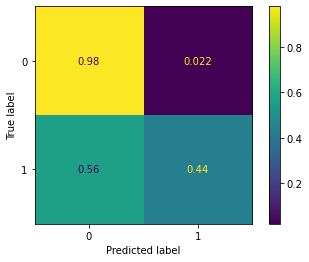

In [19]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_Val, y_val,normalize= 'true')